# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [2]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for Logistic Regression


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels.shape

(60000,)

## 4. Logistic Regression for Image Classification

*   List item
*   List item


Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [4]:

train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

logistic_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_model.fit(train_images_flat, train_labels)




KeyboardInterrupt: 

In [5]:
train_images_flat.shape

(60000, 784)

In [6]:
logistic_predictions = logistic_model.predict(test_images_flat)


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [21]:
logistic_accuracy = accuracy_score(test_labels, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.8445


## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [17]:
model = models.Sequential([
                          layers.Conv2D(64, kernel_size=(4, 4), activation='relu', input_shape=(28, 28,1)),
                          layers.MaxPool2D(2,2),
                          layers.Flatten(),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(10, activation="softmax")
                          ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
X_train , X_valid   = train_images[:10000] , train_images[10000:]
y_train , y_valid   = train_labels[:10000] , train_labels[10000:]

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=2000, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 510ms/step - accuracy: 0.2470 - loss: 2.2029 - val_accuracy: 0.3602 - val_loss: 1.8628
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.3865 - loss: 1.7556 - val_accuracy: 0.4534 - val_loss: 1.4647
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4955 - loss: 1.3769 - val_accuracy: 0.6049 - val_loss: 1.1510
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6374 - loss: 1.0808 - val_accuracy: 0.6949 - val_loss: 0.9118
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.7135 - loss: 0.8641 - val_accuracy: 0.7501 - val_loss: 0.7535
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7545 - loss: 0.7214 - val_accuracy: 0.7648 - val_loss: 0.6670
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7735 - loss: 0.6347 - val_accuracy: 0.7694 - val_loss: 0.6235
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7791 - loss: 0.6047 - val_accuracy: 0.7853 - val_loss: 0.58

## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


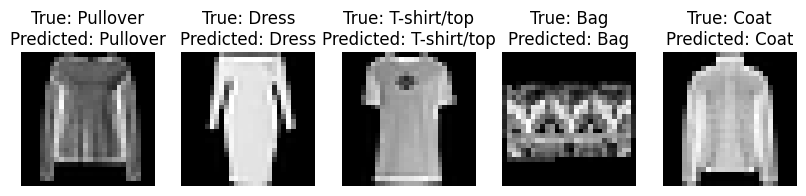

In [19]:

import matplotlib.pyplot as plt

# Select a few random images from the test set
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images)
images = test_images[random_indices]
labels = test_labels[random_indices]

# Get model predictions for these images
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the images with their true and predicted labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
for i in range(num_images):
  plt.subplot(1, num_images, i + 1)
  plt.imshow(images[i], cmap='gray')
  plt.title(f"True: {class_names[labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}")
  plt.axis('off')

plt.show()


### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.